# Classification Template

## Installing Pycaret

In [1]:
# !pip install pycaret --user
# !pip install pycaret-nightly --user

## Import Libraries

In [1]:
import pandas as pd
from pycaret.classification import *

## Import Dataset

In [2]:
# path to your dataset, can be a csv file or xlsx
dataset_path = "../Bank_Personal_Loan_Modelling_transformed.xlsx"

## use code as per the type of data source

## use below line to read data from csv file
## df = pd.read_csv(dataset_path)
df = pd.read_excel(dataset_path, index_col=0)

In [3]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,,,,,,,,,,,,,
1,-1.0,-0.95,-0.254237,-0.863923,1.0,0.055556,-0.5,0.0,1,0,-1,0,0
2,0.0,-0.05,-0.508475,-1.241379,0.5,0.000000,-0.5,0.0,1,0,-1,0,0
3,-0.3,-0.25,-0.898305,0.475714,-0.5,-0.277778,-0.5,0.0,0,0,-1,0,0
4,-0.5,-0.55,0.610169,0.250278,-0.5,0.666667,0.0,0.0,0,0,-1,0,0
5,-0.5,-0.60,-0.322034,-0.781238,1.0,-0.277778,0.0,0.0,0,0,-1,1,0


## Data Setup
* See [here](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb) for notebook example(basic level)
* See [here](https://pycaret.org/classification/) for classification documentation.

In [4]:
data=setup(df,target='Personal Loan', categorical_features=['Family', 'Education'], 
           train_size = 0.8, fold=5)

,Description,Value
0,session_id,1990
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5000, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparing models and selecting top 3

In [5]:
#Selecting top3 models for tuning
top3_models=compare_models(n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9880,0.9978,0.8895,0.9827,0.9334,0.9268,0.9284,0.4660
lightgbm,Light Gradient Boosting Machine,0.9877,0.9980,0.8921,0.9776,0.9323,0.9256,0.9271,0.0740
gbc,Gradient Boosting Classifier,0.9870,0.9972,0.8947,0.9659,0.9288,0.9217,0.9226,0.2240
et,Extra Trees Classifier,0.9850,0.9930,0.8474,0.9940,0.9145,0.9063,0.9100,0.4240
dt,Decision Tree Classifier,0.9832,0.9472,0.9026,0.9202,0.9108,0.9015,0.9019,0.0320
ada,Ada Boost Classifier,0.9635,0.9733,0.7395,0.8568,0.7938,0.7739,0.7764,0.0960
lr,Logistic Regression,0.9582,0.9579,0.6579,0.8746,0.7501,0.7278,0.7371,0.8820
knn,K Neighbors Classifier,0.9580,0.9210,0.5658,0.9875,0.7189,0.6980,0.7300,0.1400
lda,Linear Discriminant Analysis,0.9470,0.9586,0.6211,0.7813,0.6907,0.6622,0.6681,0.0240
svm,SVM - Linear Kernel,0.9460,0.0000,0.6711,0.8063,0.6956,0.6676,0.6909,0.0460


In [6]:
print(top3_models)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1990, verbose=0,
                       warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1990, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_fr

## Tuning Models
* Compare model just evaluates using the default hyperparameters, tune model will use cross validation to tune the models, here we will tune top 3 models selected in compare models.

In [10]:
tune_model(top3_models[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9825,0.9971,0.9868,0.8523,0.9146,0.9049,0.9080
1,0.9812,0.9972,0.9605,0.8588,0.9068,0.8964,0.8982
2,0.9825,0.9929,0.9211,0.8974,0.9091,0.8994,0.8995
3,0.9788,0.9956,0.9211,0.8642,0.8917,0.8800,0.8805
4,0.9838,0.9967,0.9737,0.8706,0.9193,0.9103,0.9120
Mean,0.9817,0.9959,0.9526,0.8687,0.9083,0.8982,0.8996
SD,0.0017,0.0016,0.0271,0.0156,0.0094,0.0103,0.0109


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=260,
                       n_jobs=-1, oob_score=False, random_state=1990, verbose=0,
                       warm_start=False)

In [11]:
tune_model(top3_models[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9875,0.9981,0.9079,0.9583,0.9324,0.9256,0.9260
1,0.9875,0.9983,0.8947,0.9714,0.9315,0.9246,0.9256
2,0.9838,0.9913,0.8553,0.9701,0.9091,0.9002,0.9024
3,0.9850,0.9872,0.8684,0.9706,0.9167,0.9085,0.9101
4,0.9862,0.9968,0.8816,0.9710,0.9241,0.9166,0.9179
Mean,0.9860,0.9943,0.8816,0.9683,0.9228,0.9151,0.9164
SD,0.0015,0.0044,0.0186,0.0050,0.0089,0.0097,0.0091


LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=280, n_jobs=-1, num_leaves=90, objective=None,
               random_state=1990, reg_alpha=0.001, reg_lambda=0.5, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [12]:
tune_model(top3_models[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9987,0.9605,0.9605,0.9605,0.9564,0.9564
1,0.9888,0.9979,0.9079,0.9718,0.9388,0.9326,0.9332
2,0.9850,0.9919,0.8553,0.9848,0.9155,0.9073,0.9100
3,0.9850,0.9783,0.8816,0.9571,0.9178,0.9096,0.9105
4,0.9850,0.9966,0.8947,0.9444,0.9189,0.9107,0.9111
Mean,0.9872,0.9927,0.9000,0.9638,0.9303,0.9233,0.9242
SD,0.0030,0.0076,0.0349,0.0137,0.0173,0.0189,0.0183


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1990, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
#Tuning the top 3 models
tuned_model_top3=[tune_model(i) for i in top3_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9987,0.9605,0.9605,0.9605,0.9564,0.9564
1,0.9888,0.9979,0.9079,0.9718,0.9388,0.9326,0.9332
2,0.9850,0.9919,0.8553,0.9848,0.9155,0.9073,0.9100
3,0.9850,0.9783,0.8816,0.9571,0.9178,0.9096,0.9105
4,0.9850,0.9966,0.8947,0.9444,0.9189,0.9107,0.9111
Mean,0.9872,0.9927,0.9000,0.9638,0.9303,0.9233,0.9242
SD,0.0030,0.0076,0.0349,0.0137,0.0173,0.0189,0.0183


In [20]:
print(tuned_model_top3)

[RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=260,
                       n_jobs=-1, oob_score=False, random_state=1990, verbose=0,
                       warm_start=False), LGBMClassifier(bagging_fraction=0.7, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=46, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=280, n_jobs=-1, num_leaves=90, objective=None,
               random_state=1990, reg_alpha=0.001, reg_lambda=

## Ensembling
* Create ensemble using the top 3 tuned model

NOTE: Notice the output of a cell is for last model executed. Not all three.

In [21]:
#Ensembling top 3 tuned models
bagged_tuned_top3=[ensemble_model(i,method='Bagging') for i in tuned_model_top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9900,0.9980,0.9211,0.9722,0.9459,0.9404,0.9409
1,0.9862,0.9985,0.8684,0.9851,0.9231,0.9156,0.9178
2,0.9850,0.9888,0.8684,0.9706,0.9167,0.9085,0.9101
3,0.9850,0.9908,0.8684,0.9706,0.9167,0.9085,0.9101
4,0.9850,0.9927,0.8684,0.9706,0.9167,0.9085,0.9101
Mean,0.9862,0.9938,0.8789,0.9738,0.9238,0.9163,0.9178
SD,0.0019,0.0039,0.0211,0.0057,0.0113,0.0124,0.0119


In [22]:
print(bagged_tuned_top3)

[BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=11,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0001,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=3,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=

## Blending Models

In [13]:
#Blend top3 models
blender=blend_models(estimator_list=top3_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9925,0.9987,0.9474,0.9730,0.9600,0.9559,0.9560
1,0.9888,0.9991,0.9079,0.9718,0.9388,0.9326,0.9332
2,0.9862,0.9964,0.8684,0.9851,0.9231,0.9156,0.9178
3,0.9888,0.9976,0.8947,0.9855,0.9379,0.9318,0.9331
4,0.9875,0.9981,0.8947,0.9714,0.9315,0.9246,0.9256
Mean,0.9888,0.9980,0.9026,0.9774,0.9383,0.9321,0.9331
SD,0.0021,0.0009,0.0258,0.0065,0.0122,0.0134,0.0128


## Stacking models

In [14]:
stacker=stack_models(top3_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9900,0.9959,0.9474,0.9474,0.9474,0.9418,0.9418
1,0.9888,0.9981,0.9079,0.9718,0.9388,0.9326,0.9332
2,0.9850,0.9851,0.8684,0.9706,0.9167,0.9085,0.9101
3,0.9888,0.9872,0.9079,0.9718,0.9388,0.9326,0.9332
4,0.9862,0.9963,0.8816,0.9710,0.9241,0.9166,0.9179
Mean,0.9877,0.9925,0.9026,0.9665,0.9331,0.9264,0.9273
SD,0.0018,0.0053,0.0271,0.0096,0.0111,0.0121,0.0115


## Plot Model results

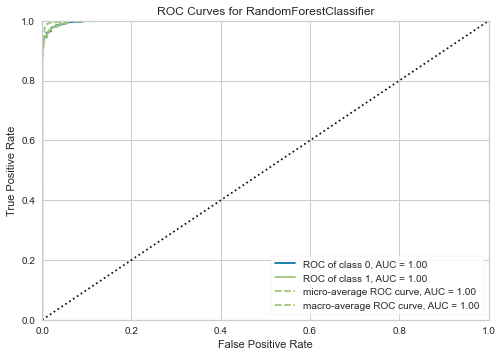

In [15]:
plot_model(top3_models[0])

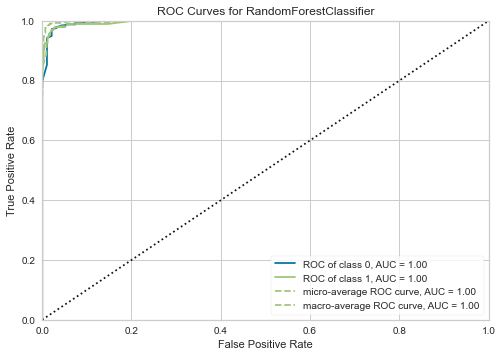

In [16]:
plot_model(top3_models[1])

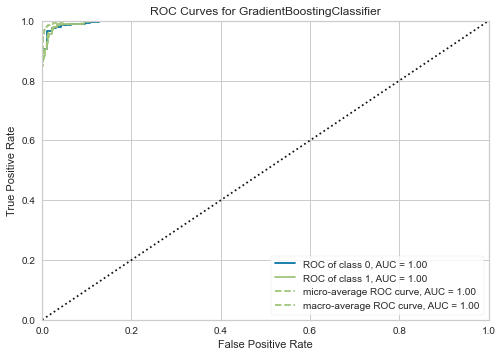

In [17]:
plot_model(top3_models[2])

## Evaluate Models

In [16]:
evaluate_model(top3_models[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
evaluate_model(top3_models[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
evaluate_model(top3_models[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 2. Explainability Techniques

* Read more on using pycaret models separately with SHAP
* Or better how to work with SHAP in pycaret

In [ ]:
!pip install shap

In [28]:
final_model = top3_models[0]
final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1990, verbose=0,
                       warm_start=False)

In [29]:
import shap
explainer = shap.Explainer(final_model)

ERROR! Session/line number was not unique in database. History logging moved to new session 520


In [30]:
shap_values = explainer(df, check_additivity=False)

In [ ]:
shap.plots.waterfall(shap_values[0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-09f62f536042>", line 1, in <module>
    shap.plots.waterfall(shap_values[0])
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\shap\plots\_waterfall.py", line 52, in waterfall
    raise Exception("waterfall_plot requires a scalar base_values of the model output as the first " \
Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\

In [ ]:
shap.initjs()
#Visualize first prediction
shap.plots.force(shap_values[2])

ERROR! Session/line number was not unique in database. History logging moved to new session 521


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-bcd6acfdd34b>", line 3, in <module>
    shap.plots.force(shap_values[2])
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\shap\plots\_force.py", line 92, in force
    raise Exception("In v0.20 force_plot now requires the base value as the first parameter! " \
Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\IPython\core\interactiveshell.py", line 2054, in showtraceback
    stb = value._render_

In [ ]:
display(shap.plots.force(explainer.expected_value[0], shap_values[0]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\IPython\core\interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-0299eb6a12d4>", line 1, in <module>
    display(shap.plots.force(explainer.expected_value[0], shap_values[0]))
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\shap\plots\_force.py", line 103, in force
    return visualize(shap_values)
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\shap\plots\_force.py", line 345, in visualize
    assert False, "visualize() can only display Explanation objects (or arrays of them)!"
AssertionError: visualize() can only display Explanation objects (or arrays of them)!

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shubham\.conda\envs\finance\lib\site-packages\IPython\core\interactiveshell.py", line 2054, in showtracebac

ERROR! Session/line number was not unique in database. History logging moved to new session 522


### SHAP on sample dataset

In [31]:
!pip install xgboost

ERROR! Session/line number was not unique in database. History logging moved to new session 524


In [32]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)



In [33]:
shap_values

.values =
array([[-4.28501666e-01, -6.66367188e-02,  7.78602287e-02, ...,
         2.56694555e-01, -5.39071299e-02,  5.78832483e+00],
       [-1.59477890e-01, -3.92092764e-02, -9.65500847e-02, ...,
         4.60188717e-01,  1.29054254e-03,  1.54787719e+00],
       [-6.22594878e-02, -3.92413028e-02, -1.63524270e-01, ...,
         3.61137800e-02,  2.09844872e-01,  7.91517401e+00],
       ...,
       [-3.46925646e-01, -1.13532774e-03, -9.87499580e-02, ...,
        -2.10595775e+00, -8.69371593e-02,  2.02094817e+00],
       [ 3.54982555e-01, -1.44685265e-02, -8.39682892e-02, ...,
        -1.67015433e+00,  9.48226675e-02,  2.35491967e+00],
       [-9.26840603e-01, -2.58212350e-03, -2.59856015e-01, ...,
        -1.92664945e+00, -3.10639203e-01,  6.63177595e-02]], dtype=float32)

.base_values =
array([22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.532942, 22.532942,
       22.532942, 22.532942, 22.532942, 22.532942, 22.53

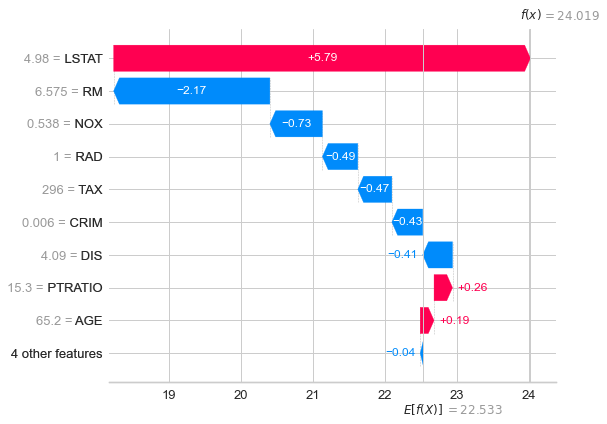

In [34]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

ERROR! Session/line number was not unique in database. History logging moved to new session 525


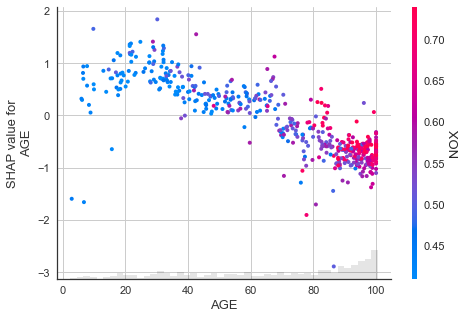

In [35]:
#Visualize all predictions
shap.plots.scatter(shap_values[:,"AGE"],shap_values)

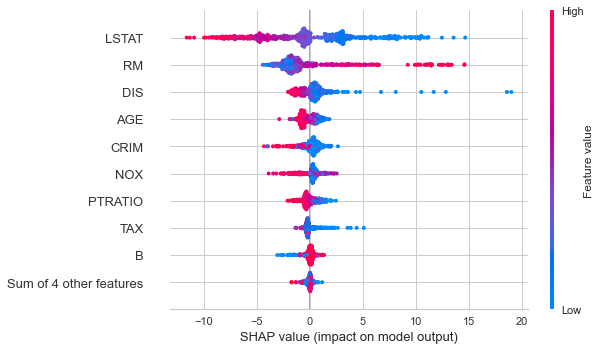

In [37]:
shap.plots.beeswarm(shap_values)

### Interpretation using Pycaret SHAP implementation
* Note that is only supports tree based model, read more [here](https://pycaret.org/classification/).

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1990, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


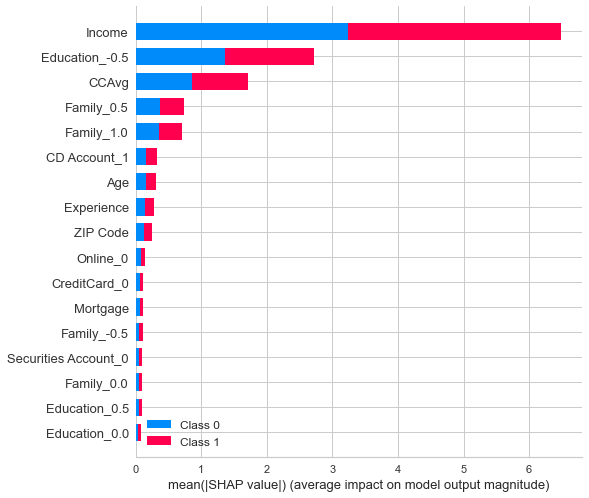

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [38]:
top3_models
#[interpret_model(i) for i in best_model]
interpret_model(top3_models[1],)

In [40]:
# , use_holdout = False
final_model=automl(optimize = 'Accuracy')

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Accuracy, use_holdout=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                   

In [41]:
print(final_model)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

## Saving final model to drive

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [22]:
save_model(final_model,'/content/gdrive/My Drive/regression_final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'children',
                                                             'smoker',
                                                             'region'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_val...
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                            